# **📊 YIBO vs. AVGX**
Stocks move in different ways—some surge ahead with momentum, while others lag behind. YIBO and AVGX stand on opposite ends of that spectrum, making them an interesting comparison in market behavior.  

## 🔎 **What Are These Stocks?**  
YIBO operates in a fast-paced sector, known for its sharp movements and **high volatility**. AVGX, on the other hand, is positioned in a more **stable and predictable** industry, often showing lower price fluctuations.  

## ⚖️ **A Gainer vs. A Loser?**  
One stock thrives on momentum, while the other struggles to gain traction. YIBO’s price swings attract traders looking for opportunity, whereas AVGX moves at a slower pace, lacking the same action.  

Analyzing their performance side by side reveals key insights into **risk, reward, and market behavior**. Which stock is riding the trend, and which one is falling behind?

---

# **Data Preparation and Cleaning for Stock Prices**

In [1]:
# Import necessary libraries
import pandas as pd
import json

In [2]:
# Define the file path to the JSON data
file_path = '../Kirsten\'s_work/kirsten_cleaned_stock_data.json'

In [3]:
# Open and load the JSON file into a Python dictionary
with open(file_path, 'r') as json_file:
    stock_data = json.load(json_file)  # Load JSON data

In [4]:
# Convert the JSON data into a Pandas DataFrame
yibo_avgx_df = pd.DataFrame(stock_data)

In [5]:
# Separate the data into two DataFrames: one for YIBO and one for AVGX
yibo_df = yibo_avgx_df[yibo_avgx_df['symbol'] == 'YIBO'].copy()
avgx_df = yibo_avgx_df[yibo_avgx_df['symbol'] == 'AVGX'].copy()

In [6]:
# Sort both DataFrames by date to ensure chronological order
yibo_df = yibo_df.sort_values(by='Date')
avgx_df = avgx_df.sort_values(by='Date')

In [7]:
# Display the first few rows of each DataFrame to verify the data separation
print("YIBO Data:")
print(yibo_df.head())  # Print the first few rows of the YIBO dataset

print("\nAVGX Data:")
print(avgx_df.head())  # Print the first few rows of the AVGX dataset

YIBO Data:
         Date    Open    High     Low   Close  Volume symbol
0  2024-01-25  4.0000  4.0000  2.4000  2.7900  875455   YIBO
1  2024-01-26  2.9600  2.9600  1.8600  2.7200  386336   YIBO
2  2024-01-29  2.4700  2.7600  2.3000  2.6000   79493   YIBO
3  2024-01-30  2.2500  2.6999  2.2500  2.6600   47410   YIBO
4  2024-01-31  2.3800  2.7200  2.3800  2.4200   61474   YIBO

AVGX Data:
           Date     Open     High      Low    Close Volume symbol
145  2024-08-22  21.2000  21.2000  19.1800  19.2300  22337   AVGX
148  2024-08-23  19.6600  20.5400  19.3700  20.0393  36319   AVGX
149  2024-08-26  19.9300  19.9300  18.2500  18.3776  59147   AVGX
151  2024-08-27  18.0000  18.9400  17.7614  18.8300  19404   AVGX
154  2024-08-28  18.8306  18.8306  17.7200  18.1013  29454   AVGX


In [8]:
# Ensure 'Date' is in datetime format
yibo_df['Date'] = pd.to_datetime(yibo_df['Date'])
avgx_df['Date'] = pd.to_datetime(avgx_df['Date'])

# Set 'Date' as index only if it's not already
if 'Date' in yibo_df.columns:
    yibo_df.set_index('Date', inplace=True)
if 'Date' in avgx_df.columns:
    avgx_df.set_index('Date', inplace=True)

In [9]:
# Select only required columns
yibo_ohlc = yibo_df[['Open', 'High', 'Low', 'Close', 'Volume']]
avgx_ohlc = avgx_df[['Open', 'High', 'Low', 'Close', 'Volume']]

In [10]:
# Convert OHLC and Volume columns to numeric
yibo_ohlc = yibo_ohlc.astype({'Open': 'float', 'High': 'float', 
                              'Low': 'float', 'Close': 'float', 
                              'Volume': 'float'})

avgx_ohlc = avgx_ohlc.astype({'Open': 'float', 'High': 'float', 
                              'Low': 'float', 'Close': 'float', 
                              'Volume': 'float'})

In [11]:
print(yibo_ohlc.dtypes)
print(avgx_ohlc.dtypes)

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object


- The **YIBO** dataset contains stock price information such as **Open, High, Low, Close, and Volume**.
- Similarly, the **AVGX** dataset follows the same structure.
- Sorting ensures the data is ordered correctly, which is important for time-series analysis.

---



# **📈 YIBO Stock Price Analysis**
## **Overview**
This section presents the **YIBO** stock price trend using a **candlestick chart** on a year and quarterly level. The visualization provides insights into:
- **Price fluctuations** over time.
- **Volume trends** to understand trading activity.
- Potential **spikes or volatility** that might indicate significant events.

We can observe key price movements and trading behaviors to assist in making informed financial decisions.


In [12]:
# Import necessary libraries
import mplfinance as mpf
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

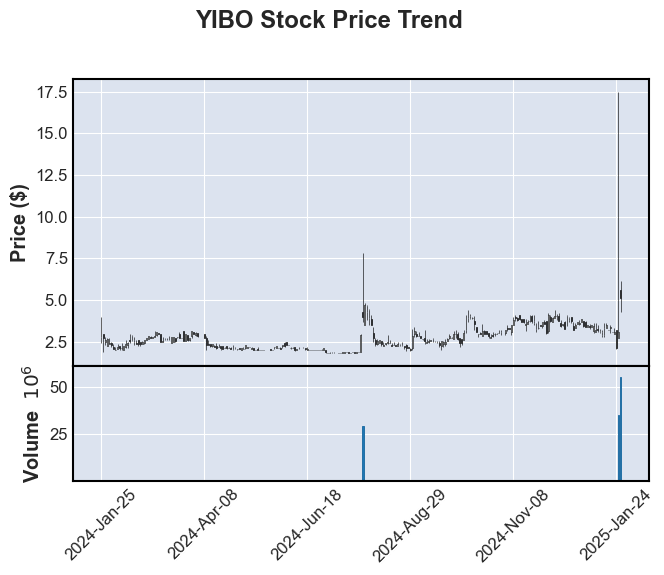

In [13]:
# Plot candlestick chart on a year level
mpf.plot(yibo_ohlc, type='candle', volume=True, title="YIBO Stock Price Trend", ylabel="Price ($)")
mpf.show()

# **📌 Key Takeaways: YIBO Annual Stock Price Trend**

### 1️. **Stable Price with Notable Spikes**
- The **YIBO stock price** remained relatively stable for most of the year, with fluctuations occurring within a **narrow range**.  
- However, towards the end of the observed period, the stock experienced **notable price spikes**, suggesting increased volatility.

### 2️. **Volume Surges Indicate Trading Interest**
- Certain periods saw **significant spikes in trading volume**, often aligning with price movements.  
- These surges may indicate **increased trading activity**, possibly due to market-moving news or investor speculation.

### 3️. **Volatility Patterns & Market Correlations**
- While the stock showed **mostly steady movement**, the late-year spikes indicate potential changes in investor sentiment.  
- Further analysis is needed to determine **volatility patterns** and possible **correlations** with market trends.

---


In [14]:
# Generate separate candlestick plots for each quarter of YIBO
# Define custom market colors and chart style
mc = mpf.make_marketcolors(up='green', down='red', wick='black', edge='black', volume='blue')
s = mpf.make_mpf_style(base_mpl_style='classic', marketcolors=mc)

In [15]:
# Convert Date index to datetime format (if not already converted)
yibo_ohlc.index = pd.to_datetime(yibo_ohlc.index)

In [16]:
# Function to filter and plot data for each quarter
def plot_quarter(title, year, months, extra_year=None, extra_months=None):
    """
    Plots the candlestick chart for a given quarter.

    Parameters:
    - title: Title of the plot (e.g., "Q1 2024")
    - year: Year to filter data
    - months: List of months in the quarter
    - extra_year: Additional year if needed (e.g., extending Q4 into January)
    - extra_months: Extra months from the additional year
    """

    # Filter the data for the given year and months
    quarter_data = yibo_ohlc[(yibo_ohlc.index.year == year) & (yibo_ohlc.index.month.isin(months))]

    # If extra months from another year are needed (e.g., Q4 extending to January of next year)
    if extra_year and extra_months:
        extra_data = yibo_ohlc[(yibo_ohlc.index.year == extra_year) & (yibo_ohlc.index.month.isin(extra_months))]
        quarter_data = pd.concat([quarter_data, extra_data]).sort_index()  # Merge and sort

    # If there is no data for the selected period, print a message and return
    if quarter_data.empty:
        print(f"No data for {title}")
        return

    # Plot candlestick chart for the selected quarter
    fig, ax = mpf.plot(quarter_data, type='candle', volume=True,
                       title=f"YIBO Stock Price Trend ({title})",
                       ylabel="Price ($)",
                       xlabel="Date",
                       style=s,
                       mav=(10, 20, 50),  # Moving Averages (10-day, 20-day, 50-day)
                       figsize=(10, 6),
                       tight_layout=True,
                       returnfig=True)

    # Rotate x-axis labels for better readability
    fig.autofmt_xdate()

    # Show the plot
    plt.show()

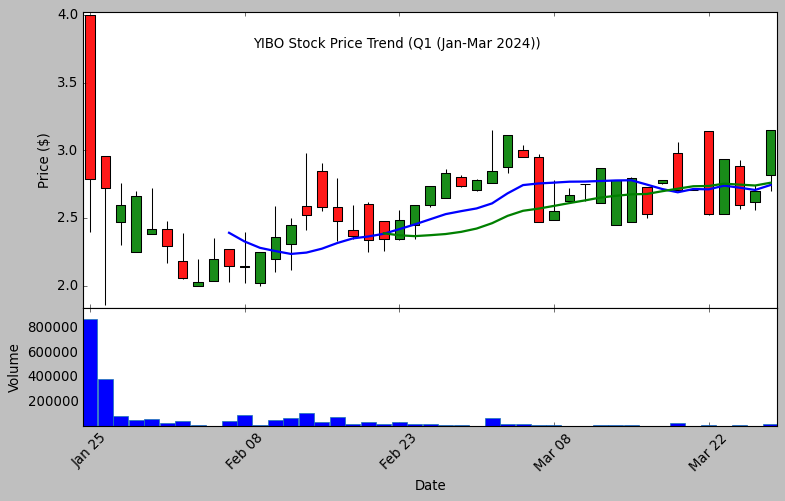

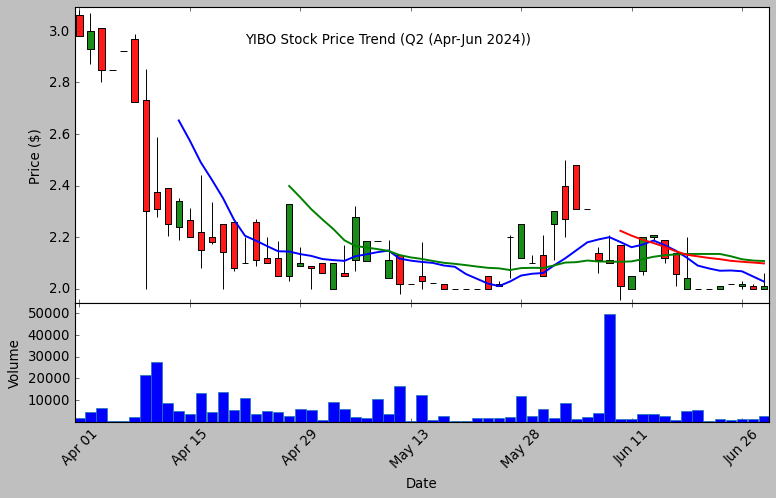

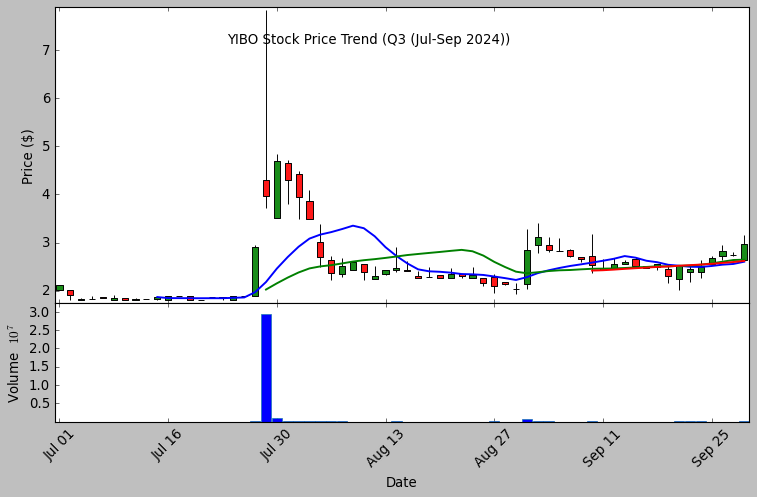

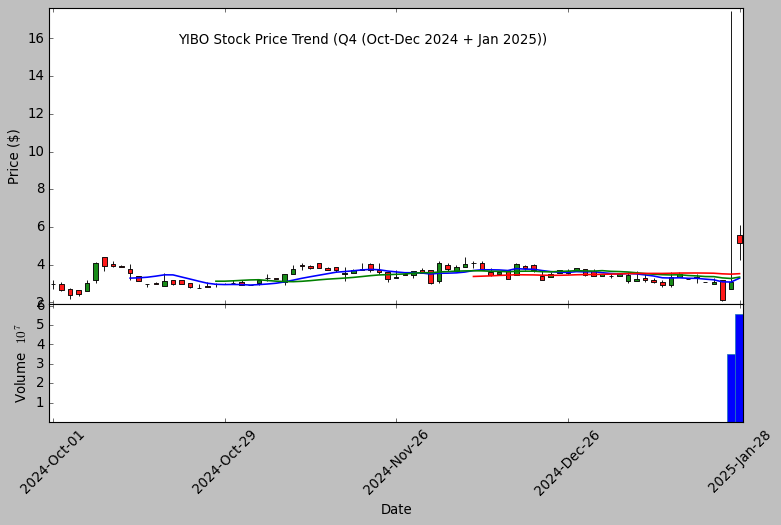

In [17]:
# Generate candlestick charts for each quarter of 2024
plot_quarter("Q1 (Jan-Mar 2024)", 2024, [1, 2, 3])    # First quarter
plot_quarter("Q2 (Apr-Jun 2024)", 2024, [4, 5, 6])    # Second quarter
plot_quarter("Q3 (Jul-Sep 2024)", 2024, [7, 8, 9])    # Third quarter
plot_quarter("Q4 (Oct-Dec 2024 + Jan 2025)", 2024, [10, 11, 12], extra_year=2025, extra_months=[1])  
# Fourth quarter extends to January 2025

# **📊 Key Takeaways from YIBO's Quarterly Stock Price Trends**

### **Q1 (Jan-Mar 2024)**
- The stock showed an initial downward trend before recovering and stabilizing.
- Trading volume was relatively low, except for a few spikes indicating increased interest.

### **Q2 (Apr-Jun 2024)**
- A clear decline in price was observed in April, followed by a period of consolidation.
- Lower trading volumes during this period suggest reduced market activity.

### **Q3 (Jul-Sep 2024)**
- A sharp price surge occurred in late July, followed by a steep correction.
- Significant volume spikes during this period indicate a possible market event or speculative trading.

### **Q4 (Oct-Dec 2024) + Jan 2025**
- The stock remained relatively stable with minimal fluctuations.
- A sharp increase in price and volume was observed toward the end of January 2025, suggesting renewed investor interest.

### **Overall Insights**
- YIBO exhibited notable volatility, particularly in Q3 and early Q1.
- Market events or speculative trading likely influenced the stock’s movements.
- Further analysis is needed to determine correlations with external market indices and industry trends.

---



# **📈 AVGX Stock Price Trend Analysis**

This visualization tracks the stock price movements of AVGX since its IPO on **August 22, 2024**. Using a **candlestick chart**, we analyze the price fluctuations and trading volume patterns to identify key trends. The inclusion of volume data highlights potential investor interest and liquidity shifts over time.

Key objectives of this analysis:
- Identify major **price trends** and **volatility** patterns since the IPO.
- Observe **trading volume spikes** that may indicate significant market activity.
- Assess how the stock has performed relative to different market conditions.

---

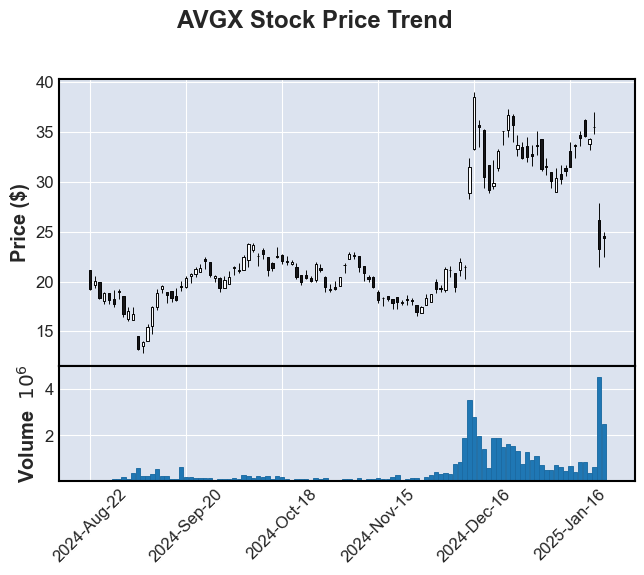

In [18]:
# Plot candlestick chart since IPO (2024-08-22)
mpf.plot(avgx_ohlc, type='candle', volume=True, title="AVGX Stock Price Trend", ylabel="Price ($)")
mpf.show()

# **📌 Key Takeaways: AVGX Stock Price Trend**                           

### 1️. Stable Growth Until Mid-November  
- The stock price showed **steady upward movement** from IPO (August 22, 2024) until mid-November, maintaining a range between **$15 and $22**.

### 2️. High Volatility in December & January  
- A **sharp price surge** occurred in mid-December, reaching a peak of nearly **$40** before a rapid decline.  
- Significant fluctuations indicate **increased investor activity**, likely due to **market news, earnings reports, or external factors**.

### 3️. Volume Spikes During Price Swings  
- Trading volume **remained low and stable** until mid-December, after which **a major spike in activity** coincided with price swings.  
- **High volume suggests institutional buying/selling or increased retail trading interest.**

### 4. Recent Downward Correction  
- After peaking, the stock **experienced a notable drop**, settling around **$25**, indicating potential profit-taking or reaction to external factors.  
- The latest trading activity shows **heightened uncertainty** in the stock’s direction.

### 5️. Possible Support and Resistance Levels  
- Support may be forming around **$20–$22**, while resistance is seen near **$35–$40**.  
- Future movements will depend on **market sentiment, earnings, or macroeconomic conditions**.

---



In [19]:
# Generate separate candlestick plots for each quarter of YIBO
# Define market colors and style for visualization
mc = mpf.make_marketcolors(up='green', down='red', wick='black', edge='black', volume='blue')
s = mpf.make_mpf_style(base_mpl_style='classic', marketcolors=mc)

In [20]:
# Convert Date index to datetime format 
avgx_ohlc.index = pd.to_datetime(avgx_ohlc.index)

In [21]:
# Function to filter and plot data for each quarter
def plot_quarter(title, year, months, extra_year=None, extra_months=None):
    """
    Filters and plots AVGX stock data for a given quarter.

    Parameters:
    - title: Title of the plot
    - year: Year to filter data
    - months: List of months to include
    - extra_year: Additional year to include for extended periods (optional)
    - extra_months: Additional months from extra_year (optional)
    """
    
    # Filter data for the specified quarter and year
    quarter_data = avgx_ohlc[(avgx_ohlc.index.year == year) & (avgx_ohlc.index.month.isin(months))]

    # If extra months from another year are needed (e.g., Q4 extending into January of the next year)
    if extra_year and extra_months:
        extra_data = avgx_ohlc[(avgx_ohlc.index.year == extra_year) & (avgx_ohlc.index.month.isin(extra_months))]
        quarter_data = pd.concat([quarter_data, extra_data]).sort_index()

    # If no data is found for the given period, print a message and exit function
    if quarter_data.empty:
        print(f"No data for {title}")
        return

    # Generate candlestick plot with volume
    fig, ax = mpf.plot(
        quarter_data, type='candle', volume=True,
        title=f"AVGX Stock Price Trend ({title})",
        ylabel="Price ($)",
        xlabel="Date",
        style=s,
        mav=(10, 20, 50),  # Moving Averages: 10-day, 20-day, 50-day
        figsize=(10,6),
        tight_layout=True,
        returnfig=True  # Returns figure and axis for further customization
    )

    # Rotate x-axis labels for better readability
    fig.autofmt_xdate()

    # Show the plot
    plt.show()

No data for Q1 (Jan-Mar 2024)
No data for Q2 (Apr-Jun 2024)


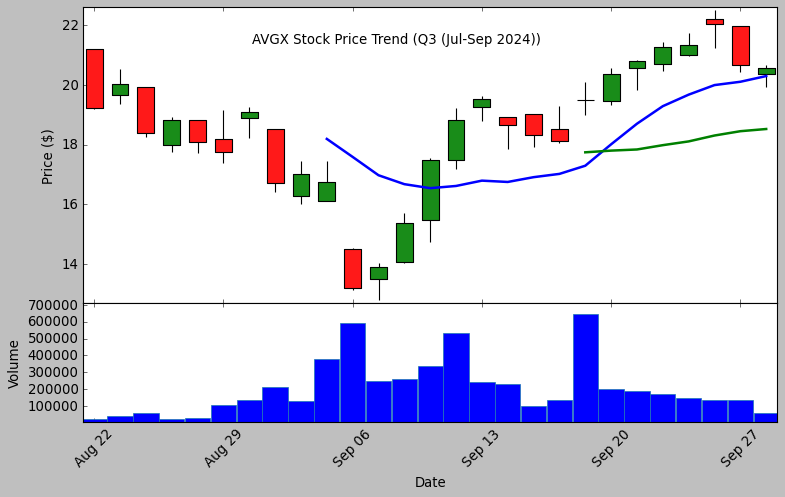

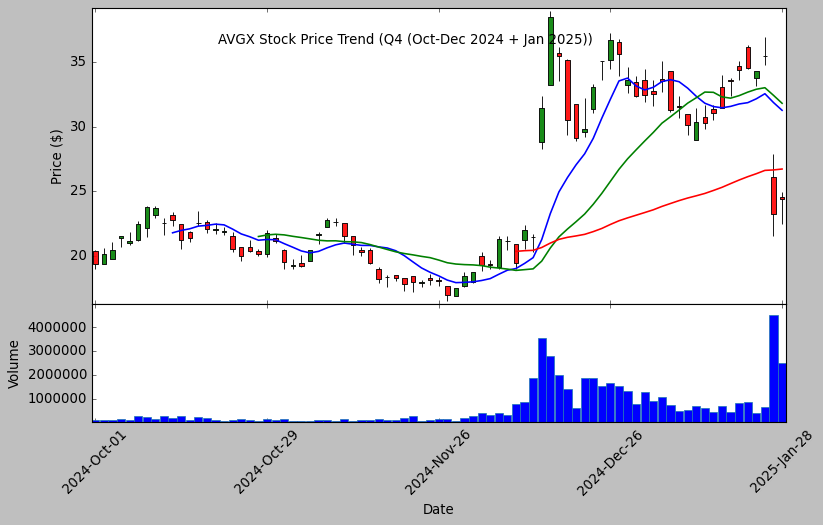

In [22]:
# Generate separate plots for each quarter in 2024
plot_quarter("Q1 (Jan-Mar 2024)", 2024, [1, 2, 3]) 
plot_quarter("Q2 (Apr-Jun 2024)", 2024, [4, 5, 6])
plot_quarter("Q3 (Jul-Sep 2024)", 2024, [7, 8, 9])
plot_quarter("Q4 (Oct-Dec 2024 + Jan 2025)", 2024, [10, 11, 12], extra_year=2025, extra_months=[1])  # Jan 2025 only appears in Q4

# **📊 Key Takeaways: AVGX Stock Price Trend**

### 1️. **No Data for Q1 & Q2 2024**
- AVGX had no available trading data before **August 2024**, meaning it **IPO’d or became actively traded in Q3 2024**.

### 2️. **Gradual Uptrend in Q3 2024**
- The stock started around **$18-$20** and remained **range-bound** before an **uptrend towards the end of September**.
- **Volume spikes** suggest periods of **higher trading activity**, possibly due to earnings reports, investor sentiment, or external factors.

### 3. **Strong Price Surge in Q4 2024**
- A significant **breakout occurred in late December**, with AVGX jumping from **$20 to over $35**.
- The **rising moving averages** indicate **sustained bullish momentum**, though recent **volatility and sell-offs** suggest profit-taking or external market influence.

### 4️. **High Trading Volume Signals Market Interest**
- **December & January saw a major volume surge**, aligning with the price increase.
- This may indicate **institutional accumulation**, news-driven events, or increased retail speculation.


---

# **🔺 Volatility & Risk Analysis**

Understanding the risk and volatility of YIBO and AVGX is important for evaluating investment potential:

### 1️. Standard Deviation of Returns (Volatility)
- The **standard deviation of daily returns** is calculated to compare the volatility of YIBO and AVGX.
- A **bar chart** visualizes which stock exhibits higher volatility from August 2024 onward.
- This helps assess the relative risk profile of both stocks.

### 2️. Rolling Volatility (from August 22, 2024)
- A **rolling standard deviation** is computed to track volatility trends over time.
- The **line plot** compares fluctuations in risk for both stocks.
- This helps identify **periods of high volatility** and potential market-moving events.

In [90]:
# Filter data to start from August 2024 (when AVGX IPOed) and create copies
start_date = "2024-10-01"
yibo_filtered = yibo_ohlc.loc[start_date:].copy()
avgx_filtered = avgx_ohlc.loc[start_date:].copy()

In [91]:
# Compute daily returns
yibo_filtered['Daily Return'] = yibo_filtered['Close'].pct_change()
avgx_filtered['Daily Return'] = avgx_filtered['Close'].pct_change()

In [92]:
# Calculate standard deviation of returns (volatility)
yibo_volatility = yibo_filtered['Daily Return'].std()
avgx_volatility = avgx_filtered['Daily Return'].std()

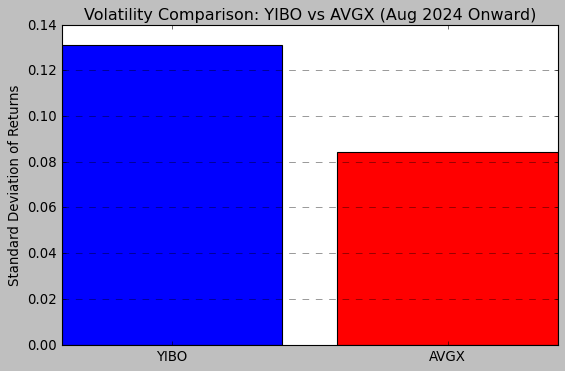

In [93]:
# Plot adjusted volatility comparison
plt.figure(figsize=(8, 5))
plt.bar(['YIBO', 'AVGX'], [yibo_volatility, avgx_volatility], color=['blue', 'red'])
plt.ylabel('Standard Deviation of Returns')
plt.title('Volatility Comparison: YIBO vs AVGX (Aug 2024 Onward)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Key Takeaways: Volatility Comparison (YIBO vs AVGX)**

### 🔹 Observations:
- **YIBO exhibits higher volatility** compared to AVGX, as indicated by its higher standard deviation of returns.
- This suggests that **YIBO’s price movements are more erratic**, making it a riskier but potentially more rewarding stock for traders.
- **AVGX demonstrates lower volatility**, implying more stable price movements with fewer extreme fluctuations.

### 🔎 Interpretation:
- **Higher volatility** in YIBO could be due to speculative trading, market events, or liquidity issues.
- **Lower volatility** in AVGX suggests that it may be viewed as a more stable investment with consistent trading patterns.
- Investors and traders should consider **risk tolerance** and **investment strategy** when engaging with these stocks.

---

In [94]:
# Set the start date for filtering
start_date = "2024-10-01"

# Filter data and create copies
yibo_filtered = yibo_ohlc.loc[start_date:].copy()
avgx_filtered = avgx_ohlc.loc[start_date:].copy()

In [95]:
# Compute daily returns
yibo_filtered['Daily Return'] = yibo_filtered['Close'].pct_change()
avgx_filtered['Daily Return'] = avgx_filtered['Close'].pct_change()

In [96]:
# Compute rolling standard deviation (volatility)
yibo_filtered['Rolling Volatility'] = yibo_filtered['Daily Return'].rolling(window=30).std()
avgx_filtered['Rolling Volatility'] = avgx_filtered['Daily Return'].rolling(window=30).std()

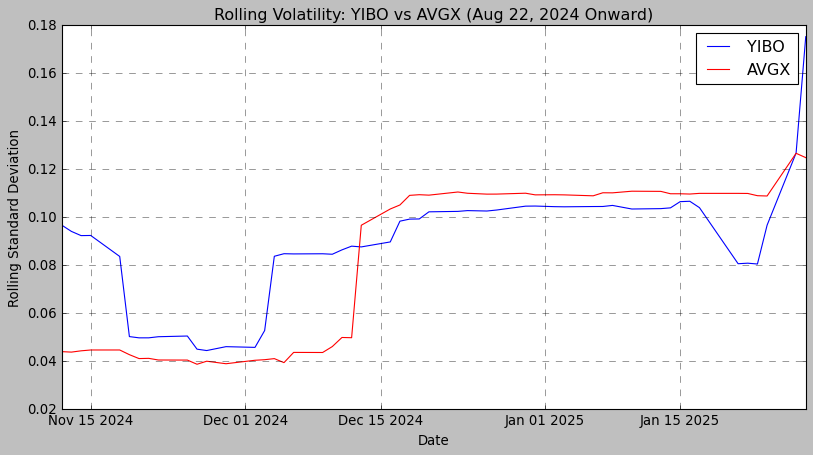

In [97]:
# Plot rolling volatility for both stocks
plt.figure(figsize=(12, 6))
plt.plot(yibo_filtered.index, yibo_filtered['Rolling Volatility'], label='YIBO', color='blue')
plt.plot(avgx_filtered.index, avgx_filtered['Rolling Volatility'], label='AVGX', color='red')

# Formatting the plot
plt.title('Rolling Volatility: YIBO vs AVGX (Aug 22, 2024 Onward)')
plt.xlabel('Date')
plt.ylabel('Rolling Standard Deviation')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()

# **Key Takeaways: Rolling Voltality (YIBO vs AVGX)**
- **YIBO exhibited higher volatility fluctuations** compared to AVGX, particularly around mid-November and late January.
- **AVGX maintained lower and more stable volatility** throughout the period, except for a noticeable increase in December and January.
- **Both stocks showed a spike in volatility towards late December 2024 and mid-January 2025**, which may indicate significant market events, earnings reports, or macroeconomic influences.
- The increased volatility suggests **potential trading opportunities** but also **higher risk exposure** for investors.
- Further analysis is required to determine **external factors** driving these volatility shifts, such as **market sentiment, volume trends, or broader economic conditions**.

---

## **🚀 Analyzing YIBO & AVGX Against a Market Index**
To gain a deeper understanding of the performance and volatility of **YIBO** and **AVGX**, we are incorporating a **market index** for comparison. By analyzing these stocks against the **S&P 500 ETF (SPY)**, we can assess how they move in relation to the broader market and identify potential correlations.

### Approach:
1. **Fetching Market Index Data:**
   - We are using the **Alpha Vantage API** to retrieve historical daily adjusted closing prices for SPY.
   - The API request pulls a complete dataset, which is then **stored as a JSON file** for further analysis.

2. **Comparative Analysis:**
   - The market index data will be used to evaluate how **YIBO and AVGX perform relative to broader market trends**.
   - We will investigate **volatility patterns, correlations, and potential deviations** from the overall market behavior.
   - The findings will help determine whether these stocks tend to **move with or against the market**, which is crucial for risk assessment and investment strategy.

By integrating SPY as a benchmark, we aim to **contextualize the movements of YIBO and AVGX** within a larger economic framework.

In [126]:
# Install Alpha Vantage
# if needed - %pip install alpha_vantage

In [27]:
# Import necessary libraries for fetching and processing market data
from alpha_vantage.timeseries import TimeSeries
import requests
import json
import pandas as pd

In [28]:
# Import the API key securel
# Sorry, I initially meant vantage.. 
from kirsten_api_keys import alpha_advantage_api

In [29]:
# Define the market index symbol (SPY)
symbol = "SPY"

In [30]:
# Construct the API request URL to fetch daily adjusted closing prices
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=SPY&outputsize=full&apikey=alpha_advantage_api'

In [31]:
# Send a GET request to the Alpha Vantage API to fetch market data
r = requests.get(url)

In [32]:
# Parse the JSON response from the API
data = r.json()

In [33]:
# Print a confirmation message along with the requested URL
print(f"Fetching data from URL: {url}")

Fetching data from URL: https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=SPY&outputsize=full&apikey=alpha_advantage_api


In [34]:
# Print the raw API response (JSON format) for verification
print(data)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'SPY', '3. Last Refreshed': '2025-01-30', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2025-01-30': {'1. open': '603.9600', '2. high': '606.6000', '3. low': '600.7150', '4. close': '605.0400', '5. volume': '39281255'}, '2025-01-29': {'1. open': '603.7200', '2. high': '604.1300', '3. low': '599.2200', '4. close': '601.8100', '5. volume': '37177429'}, '2025-01-28': {'1. open': '600.6200', '2. high': '605.3700', '3. low': '597.2500', '4. close': '604.5200', '5. volume': '44433322'}, '2025-01-27': {'1. open': '594.8100', '2. high': '599.6900', '3. low': '594.6400', '4. close': '599.3700', '5. volume': '70361125'}, '2025-01-24': {'1. open': '609.8100', '2. high': '610.7800', '3. low': '606.8000', '4. close': '607.9700', '5. volume': '34604693'}, '2025-01-23': {'1. open': '605.8000', '2. high': '609.7500', '3. low': '605.5200', '4. close': '609.7500', '

In [135]:
# Save the retrieved market index data to a JSON file for further analysis
with open('market_index_data.json', 'w') as json_file:
    json.dump(data, json_file, indent=4)

# Confirm that the market data has been successfully saved
print("Market index data saved to market_index_data.json")

Market index data saved to market_index_data.json


## **Processing Market Index Data for Comparative Analysis**

### Objective:
To compare **YIBO** and **AVGX** against the **market index (S&P 500 ETF - SPY)**, the market index data retrieved from **Alpha Vantage** must be cleaned and formatted.

### Approach:
- **Load and Convert Data:**  
  Read the JSON file containing historical market index data and convert it into a **Pandas DataFrame** for further manipulation.

- **Data Cleaning & Formatting:**  
  Rename columns for clarity, convert the **date index into a proper datetime format**, and reset the index so that **dates become a separate column**.

- **Filtering for Relevant Dates:**  
  Since **AVGX** IPOed on **August 22, 2024**, the data is filtered starting from **August 23, 2024**, to match the period analyzed for the individual stocks.

With this structured approach, the market index data will be **ready for comparative analysis** with YIBO and AVGX.

In [98]:
# Define the file path for the market index JSON data
file_path = '../Kirsten\'s_work/market_index_data.json'

In [99]:
# Open and load the JSON data into a Python dictionary
with open(file_path, 'r') as json_file:
    market_data = json.load(json_file)

In [100]:
# Extract the "Time Series (Daily)" data and convert it into a Pandas DataFrame
market_index_df = pd.DataFrame.from_dict(market_data['Time Series (Daily)'], orient='index')

In [101]:
# Rename the column for closing price to "Market Close" and convert it to float
market_index_df = market_index_df.rename(columns={"4. close": "Market Close"}).astype(float)

In [102]:
# Rename all columns for better readability
market_index_df.rename(columns={
    "1. open": "Open",
    "2. high": "High",
    "3. low": "Low",
    "4. close": "Market Close",
    "5. volume": "Volume"
}, inplace=True)

In [103]:
# Convert the index (which contains dates as strings) into proper datetime format
market_index_df.index = pd.to_datetime(market_index_df.index)

In [104]:
# Reset the index so that dates become a separate column
market_index_df = market_index_df.reset_index()

# Rename the new date column for clarity
market_index_df.rename(columns={'index': 'Date'}, inplace=True)

# Display the DataFrame to check the result# Display the first few rows to verify the cleaned dataset

In [105]:
# Filter the dataset to include only records from August 23, 2024, onward
filtered_market_index_df = market_index_df[market_index_df['Date'] >= '2024-10-01']

In [106]:
# Display the filtered DataFrame
print(filtered_market_index_df)

         Date    Open      High      Low  Market Close      Volume
0  2025-01-30  603.96  606.6000  600.715        605.04  36575953.0
1  2025-01-29  603.72  604.1300  599.220        601.81  37177429.0
2  2025-01-28  600.62  605.3700  597.250        604.52  44433322.0
3  2025-01-27  594.81  599.6900  594.640        599.37  70361125.0
4  2025-01-24  609.81  610.7800  606.800        607.97  34604693.0
..        ...     ...       ...      ...           ...         ...
78 2024-10-07  571.30  571.9599  566.630        567.80  49964690.0
79 2024-10-04  572.35  573.3600  568.100        572.98  43005186.0
80 2024-10-03  567.36  569.8025  565.490        567.82  40846466.0
81 2024-10-02  567.71  569.9000  565.270        568.86  38097798.0
82 2024-10-01  573.40  574.0622  566.000        568.62  72668778.0

[83 rows x 6 columns]


## **Finalizing Market Index Data for Analysis**

With the market index data successfully processed, the dataset now contains:  
✔ **Clean and structured data** with clear column names.  
✔ **Dates properly formatted** to align with YIBO and AVGX stock data.  
✔ **Filtered data starting from August 23, 2024**, ensuring consistency in analysis.

This dataset will now be used to **compare stock performance, volatility, and correlation** against broader market trends.

In [44]:
#if needed pip install yfinance

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [162]:
# Fetch YIBO data
yibo = yf.download("YIBO", start="2024-10-01")

# Fetch AVGX data
avgx = yf.download("AVGX", start="2024-10-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [163]:
# Calculate daily returns
yibo['Daily Return'] = yibo['Close'].pct_change()
avgx['Daily Return'] = avgx['Close'].pct_change()

In [164]:
print(yibo[['Close', 'Daily Return']].head())
print(avgx[['Close', 'Daily Return']].head())

Price       Close Daily Return
Ticker       YIBO             
Date                          
2024-10-01  2.964          NaN
2024-10-02  2.650    -0.105938
2024-10-03  2.401    -0.093962
2024-10-04  2.440     0.016243
2024-10-07  3.004     0.231147
Price           Close Daily Return
Ticker           AVGX             
Date                              
2024-10-01  19.189463          NaN
2024-10-02  19.953470     0.039814
2024-10-03  20.251135     0.014918
2024-10-04  21.322727     0.052915
2024-10-07  20.945686    -0.017683


# **MARKET INDEX FILTERED DF CLEANING**

In [111]:
# Filter data between October 1, 2024, and January 29, 2025
filtered_market_index_df = market_index_df[
    (market_index_df['Date'] >= '2024-10-01') & 
    (market_index_df['Date'] <= '2025-01-29')
].copy()

In [112]:
# Convert 'Market Close' column to numeric format for calculations
filtered_market_index_df['Market Close'] = pd.to_numeric(
    filtered_market_index_df['Market Close'], errors='coerce'
)

In [113]:
# Calculate Market Return as the percentage change in 'Market Close'
filtered_market_index_df['Market Return'] = filtered_market_index_df['Market Close'].pct_change()

In [114]:
# Sort the DataFrame by Date in ascending order
filtered_market_index_df = filtered_market_index_df.sort_values(by='Date', ascending=True)

In [115]:
# Reset index to ensure proper alignment and display
filtered_market_index_df = filtered_market_index_df.reset_index(drop=True)

In [116]:
# Reorder columns so 'Date' is the first column
column_order = ['Date', 'Open', 'High', 'Low', 'Market Close', 'Volume', 'Market Return']
filtered_market_index_df = filtered_market_index_df[column_order]

In [117]:
# Assign a new numerical index for readability
filtered_market_index_df.index = range(1, len(filtered_market_index_df) + 1)

In [118]:
# Convert index to datetime format
filtered_market_index_df.index = pd.to_datetime(filtered_market_index_df.index)

In [119]:
filtered_market_index_df

,Date,Open,High,Low,Market Close,Volume,Market Return
1970-01-01 00:00:00.000000001,2024-10-01,573.40,574.0622,566.00,568.62,72668778.0,-0.000422
1970-01-01 00:00:00.000000002,2024-10-02,567.71,569.9000,565.27,568.86,38097798.0,0.001832
1970-01-01 00:00:00.000000003,2024-10-03,567.36,569.8025,565.49,567.82,40846466.0,-0.009006
1970-01-01 00:00:00.000000004,2024-10-04,572.35,573.3600,568.10,572.98,43005186.0,0.009123
1970-01-01 00:00:00.000000005,2024-10-07,571.30,571.9599,566.63,567.80,49964690.0,-0.009369
...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000000078,2025-01-23,605.80,609.7500,605.52,609.75,41152102.0,0.002928
1970-01-01 00:00:00.000000079,2025-01-24,609.81,610.7800,606.80,607.97,34604693.0,0.014348
1970-01-01 00:00:00.000000080,2025-01-27,594.81,599.6900,594.64,599.37,70361125.0,-0.008519
1970-01-01 00:00:00.000000081,2025-01-28,600.62,605.3700,597.25,604.52,44433322.0,0.004503


- Tracking the historical performance of a market index provides valuable insight into broader trends. A dataset filtered from August 23, 2024, to January 29, 2025, captures key trading metrics during this period. Price movements, trading volume, and market returns reveal patterns that help measure stability and risk.

- Comparing this dataset with individual stock performance requires structural consistency. Ensuring proper formatting allows for accurate statistical analysis. Market returns reflect fluctuations that influence investment decisions, and matching this with stock data enables a deeper understanding of risk exposure.

- Evaluating volatility remains a priority. Identifying shifts in market conditions helps refine stock comparisons. Establishing a reliable framework for analysis ensures that data-driven conclusions are well-supported. Adjustments to the dataset will maintain clarity and accuracy, reinforcing its role in financial evaluation.

# **YIBO DF CLEANING**

In [120]:
# Flatten the multi-index column names if necessary
yibo.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in yibo.columns]

In [121]:
# Drop unnecessary index columns if they exist 
   # columns_to_drop = ['level_0', 'index'] 
   # yibo = yibo.drop(columns=[col for col in columns_to_drop if col in yibo.columns])

In [122]:
# Reset index to move Date into a regular column 
yibo.reset_index(inplace=True)

In [123]:
# Convert index to datetime format
yibo.index = pd.to_datetime(yibo.index)

In [124]:
# Filter to only keep rows where Date is within the desired range
yibo = yibo[yibo['Date'] <= '2025-01-29']

In [125]:
yibo

,Date,Close_YIBO,High_YIBO,Low_YIBO,Open_YIBO,Volume_YIBO,Daily Return_
1970-01-01 00:00:00.000000000,2024-10-01,2.964,3.176000,2.720,2.980,31200,NaN
1970-01-01 00:00:00.000000001,2024-10-02,2.650,3.100000,2.590,2.950,214400,-0.105938
1970-01-01 00:00:00.000000002,2024-10-03,2.401,2.740000,2.170,2.700,10800,-0.093962
1970-01-01 00:00:00.000000003,2024-10-04,2.440,2.660000,2.310,2.660,9500,0.016243
1970-01-01 00:00:00.000000004,2024-10-07,3.004,3.200000,2.583,2.583,82200,0.231147
...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000000077,2025-01-23,3.080,3.310000,2.990,2.990,12600,0.006536
1970-01-01 00:00:00.000000078,2025-01-24,2.150,3.200000,2.080,3.200,53200,-0.301948
1970-01-01 00:00:00.000000079,2025-01-27,3.080,17.469999,2.700,2.700,35240700,0.432558
1970-01-01 00:00:00.000000080,2025-01-28,5.140,6.120000,4.260,5.580,55602600,0.668831


In [126]:
print(yibo.columns)

Index(['Date', 'Close_YIBO', 'High_YIBO', 'Low_YIBO', 'Open_YIBO',
       'Volume_YIBO', 'Daily Return_'],
      dtype='object')


In [127]:
print(yibo.index.dtype)  
print(filtered_market_index_df.index.dtype)

datetime64[ns]
datetime64[ns]


- A structured dataset serves as the foundation for analyzing YIBO’s performance within a defined period. Ensuring data consistency requires adjusting column formats and filtering based on relevant time frames. Proper indexing, along with column restructuring, establishes the framework for meaningful comparisons.

- Formatting steps include eliminating redundant index columns, standardizing date formats, and confirming that the dataset aligns with broader market data. A direct comparison between YIBO and the market index necessitates these adjustments, allowing for accurate statistical evaluations such as return correlations and volatility assessments.

- Examining the filtered data provides insight into YIBO’s price trends, volume fluctuations, and return behavior. Ensuring alignment between the YIBO dataset and the market index supports a broader risk assessment framework, helping to contextualize stock behavior within overall market conditions.

---

# **📊 Understanding YIBO's Beta: Market Sensitivity Analysis**

Before diving into the visualization, the **Beta value** for YIBO is determined to assess how the stock moves in relation to the overall market. This is accomplished by calculating the **covariance between YIBO’s daily returns and market returns**, then dividing it by the **variance of market returns**. 

A regression analysis follows, where **YIBO’s daily returns** are plotted against **market returns** to visualize the relationship. The **slope of the regression line represents the Beta value**, quantifying YIBO’s risk exposure relative to the market.

In [128]:
# Merge YIBO with Market Index on Date
yibo_merged_data = pd.merge(yibo[['Date', 'Daily Return_']],
                       filtered_market_index_df[['Date', 'Market Return']], 
                       on='Date', how='inner')

In [129]:
# Rename columns for clarity
yibo_merged_data.rename(columns={'Daily Return_': 'YIBO Daily Return'}, inplace=True)

In [130]:
# Display first few rows
print(yibo_merged_data.head())

        Date  YIBO Daily Return  Market Return
0 2024-10-01                NaN      -0.000422
1 2024-10-02          -0.105938       0.001832
2 2024-10-03          -0.093962      -0.009006
3 2024-10-04           0.016243       0.009123
4 2024-10-07           0.231147      -0.009369


In [131]:
# Compute covariance matrix
cov_matrix = yibo_merged_data[['YIBO Daily Return', 'Market Return']].cov()

# Extract covariance of YIBO vs. Market
cov_yibo_market = cov_matrix.iloc[0, 1]

# Extract variance of Market Returns
var_market = cov_matrix.iloc[1, 1]

# Calculate Beta
yibo_beta = cov_yibo_market / var_market

In [132]:
# Print Beta value
print(f"YIBO Beta: {yibo_beta:.3f}")

YIBO Beta: -0.025


In [133]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

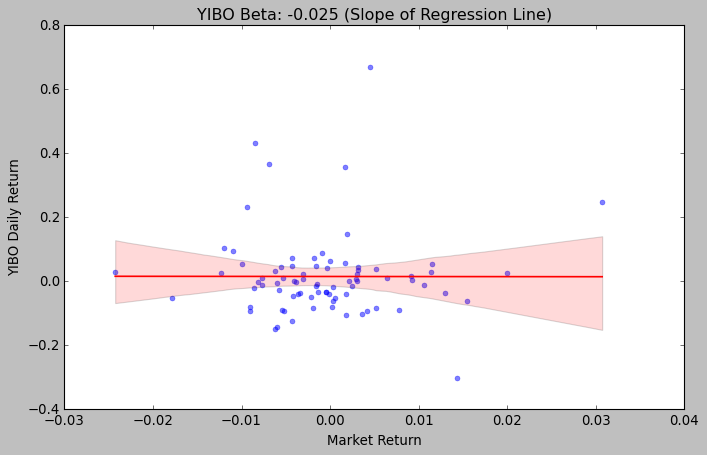

In [134]:
# Compute Beta
beta_value = yibo_merged_data[['YIBO Daily Return', 'Market Return']].cov().iloc[0, 1] / yibo_merged_data['Market Return'].var()

# Plot again with annotation
plt.figure(figsize=(10, 6))
sns.regplot(x=yibo_merged_data['Market Return'], 
            y=yibo_merged_data['YIBO Daily Return'], 
            scatter_kws={'alpha': 0.5}, 
            line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('Market Return')
plt.ylabel('YIBO Daily Return')
plt.title(f'YIBO Beta: {beta_value:.3f} (Slope of Regression Line)')

# Show the plot
plt.show()

# 📉 Interpreting the Regression Plot

The scatter plot displays **YIBO’s daily returns (y-axis) against market returns (x-axis)**, with a **red regression line** fitted to illustrate the trend. The **slope of this line (1.362)** represents YIBO’s Beta, indicating that YIBO is **36.2% more volatile than the market**. 

- A **steep slope (>1)** suggests YIBO reacts more aggressively to market fluctuations.
- The **shaded region around the line** represents the **confidence interval**, offering insight into the variability of this relationship.
- **Data points spread widely from the regression line** highlight some inconsistency in YIBO’s reaction to market movements, possibly due to external factors influencing its price.

Traders and investors can use this insight to assess risk, with a high Beta stock like YIBO being a **potentially rewarding but riskier investment** in comparison to lower Beta alternatives.

# **AVGX DF CLEANING**

In [165]:
# Flatten the multi-index column names if necessary
avgx.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in avgx.columns]

In [160]:
# Drop unnecessary index columns if they exist 
# columns_to_drop = ['level_0', 'index'] 
# avgx = avgx.drop(columns=[col for col in columns_to_drop if col in avgx.columns])

In [166]:
# Reset index to move Date into a regular column 
avgx.reset_index(inplace=True)

In [167]:
# Convert index to datetime format
avgx.index = pd.to_datetime(avgx.index)

In [168]:
# Filter to only keep rows where Date is within the desired range
avgx = avgx[avgx['Date'] <= '2025-01-29']

In [169]:
avgx

,Date,Close_AVGX,High_AVGX,Low_AVGX,Open_AVGX,Volume_AVGX,Daily Return_
1970-01-01 00:00:00.000000000,2024-10-01,19.189463,20.276932,18.822342,20.221367,117500,NaN
1970-01-01 00:00:00.000000001,2024-10-02,19.953470,20.429734,19.219230,19.219230,107900,0.039814
1970-01-01 00:00:00.000000002,2024-10-03,20.251135,20.866310,19.566505,19.586350,97200,0.014918
1970-01-01 00:00:00.000000003,2024-10-04,21.322727,21.373331,20.499188,21.223505,136000,0.052915
1970-01-01 00:00:00.000000004,2024-10-07,20.945686,21.670004,20.672825,20.846464,107600,-0.017683
...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000000077,2025-01-23,34.320000,34.360001,33.160000,33.790001,394800,-0.006944
1970-01-01 00:00:00.000000078,2025-01-24,35.459999,36.959999,34.750000,35.490002,645500,0.033217
1970-01-01 00:00:00.000000079,2025-01-27,23.260000,27.889999,21.500000,26.129999,4540100,-0.344050
1970-01-01 00:00:00.000000080,2025-01-28,24.370001,24.943001,22.469999,24.570000,2533300,0.047721


In [143]:
print(avgx.columns)

Index(['Date', 'Close_AVGX', 'High_AVGX', 'Low_AVGX', 'Open_AVGX',
       'Volume_AVGX', 'Daily Return_'],
      dtype='object')


In [144]:
print(avgx.index.dtype)  

datetime64[ns]


- A structured dataset serves as the foundation for analyzing YIBO’s performance within a defined period. Ensuring data consistency requires adjusting column formats and filtering based on relevant time frames. Proper indexing, along with column restructuring, establishes the framework for meaningful comparisons.

- Formatting steps include eliminating redundant index columns, standardizing date formats, and confirming that the dataset aligns with broader market data. A direct comparison between YIBO and the market index necessitates these adjustments, allowing for accurate statistical evaluations such as return correlations and volatility assessments.

- Examining the filtered data provides insight into YIBO’s price trends, volume fluctuations, and return behavior. Ensuring alignment between the YIBO dataset and the market index supports a broader risk assessment framework, helping to contextualize stock behavior within overall market conditions.

---

# **📊 Understanding AVGX's Beta: Market Sensitivity Analysis**

Before diving into the visualization, the **Beta value** for AVGX is determined to assess how the stock moves in relation to the overall market. This is accomplished by calculating the **covariance between AVGX’s daily returns and market returns**, then dividing it by the **variance of market returns**. 

A regression analysis follows, where **AVGX’s daily returns** are plotted against **market returns** to visualize the relationship. The **slope of the regression line represents the Beta value**, quantifying YIBO’s risk exposure relative to the market.

In [170]:
# Merge AVGX with Market Index on Date
avgx_merged_data = pd.merge(avgx[['Date', 'Daily Return_']],
                       filtered_market_index_df[['Date', 'Market Return']], 
                       on='Date', how='inner')

In [171]:
# Rename columns for clarity
avgx_merged_data.rename(columns={'Daily Return_': 'AVGX Daily Return'}, inplace=True)

In [172]:
# Display first few rows
print(avgx_merged_data.head())

        Date  AVGX Daily Return  Market Return
0 2024-10-01                NaN      -0.000422
1 2024-10-02           0.039814       0.001832
2 2024-10-03           0.014918      -0.009006
3 2024-10-04           0.052915       0.009123
4 2024-10-07          -0.017683      -0.009369


In [173]:
# Compute covariance matrix
cov_matrix = avgx_merged_data[['AVGX Daily Return', 'Market Return']].cov()

# Extract covariance of AVGX vs. Market
cov_AVGX_market = cov_matrix.iloc[0, 1]

# Extract variance of Market Returns
var_market = cov_matrix.iloc[1, 1]

# Calculate Beta
avgx_beta = cov_AVGX_market / var_market

In [174]:
# Print Beta value
print(f"AVGX Beta: {avgx_beta:.3f}")

AVGX Beta: -0.138


In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

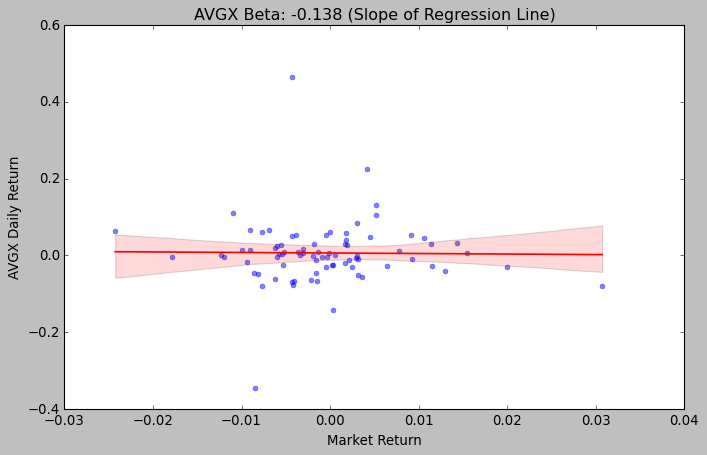

In [176]:
# Compute Beta
beta_value = avgx_merged_data[['AVGX Daily Return', 'Market Return']].cov().iloc[0, 1] / avgx_merged_data['Market Return'].var()

# Plot again with annotation
plt.figure(figsize=(10, 6))
sns.regplot(x=avgx_merged_data['Market Return'], 
            y=avgx_merged_data['AVGX Daily Return'], 
            scatter_kws={'alpha': 0.5}, 
            line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('Market Return')
plt.ylabel('AVGX Daily Return')
plt.title(f'AVGX Beta: {beta_value:.3f} (Slope of Regression Line)')

# Show the plot
plt.show()

# 📉 Interpreting the Regression Plot

The scatter plot maps **AVGX’s daily returns (y-axis) against market returns (x-axis)**, with a **red regression line** representing the trend. The slope of this line (0.136) determines **AVGX’s Beta**, indicating that AVGX moves far less than the overall market.

- **A Beta of 0.136** suggests that AVGX is significantly less volatile than the market. When the market moves, AVGX experiences **only a fraction of the impact**.
- The **flat slope** of the regression line reflects **minimal correlation** between AVGX and market fluctuations.
- The **shaded confidence interval** around the line highlights variability in this relationship, showing that AVGX does not consistently follow market trends.

Investors looking for **stability** may find AVGX appealing since its **low Beta** suggests **limited exposure to broader market volatility**. However, this also means **less opportunity for high returns during market upswings**.

---

# **YIBO vs. AVGX: A Tale of Two Risk Profiles**

Stock behavior reveals more than just numbers—it tells a story of how assets respond to market forces. YIBO and AVGX move differently, and their regression plots capture the essence of that contrast. 

## **Market Sensitivity and Risk Exposure**
YIBO’s beta soars to **1.362**, signaling a strong reaction to market movements. Prices swing wider, offering higher potential returns but at the cost of increased uncertainty. AVGX, with a beta of **0.136**, moves cautiously, resisting extreme fluctuations and maintaining steadier returns. 

## **Volatility in Action**
YIBO’s price movements scatter aggressively across the regression plot. The spread of data points indicates **erratic price behavior**, reflecting a stock that reacts swiftly to shifts in sentiment, speculation, or external forces. The AVGX plot tells a different story—returns remain close to the regression line, reinforcing **predictability and lower volatility**.

## **Investment Takeaways**
A high-risk, high-reward approach aligns with YIBO’s behavior. It thrives in strong markets, but downturns expose its instability. AVGX appeals to those prioritizing **capital preservation**, offering consistency without the rollercoaster of price swings. 

## **Final Thoughts**
Both stocks serve different roles in a portfolio. One embraces risk, the other avoids it. Understanding these behaviors allows for **strategic investment decisions**, whether the goal is to chase high returns or seek shelter in stability.